In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
missing_values = ["na", "--", ""]
df = pd.read_csv("kickstarter201801.csv", na_values=missing_values, encoding_errors="ignore")

In [4]:
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                378661 non-null  int64  
 1   name                              378657 non-null  object 
 2   category                          378661 non-null  object 
 3   main_category                     378661 non-null  object 
 4   currency                          378661 non-null  object 
 5   deadline                          378661 non-null  object 
 6   goal                              378661 non-null  float64
 7   launched                          378661 non-null  object 
 8   pledged                           378661 non-null  float64
 9   state                             378661 non-null  object 
 10  backers                           378661 non-null  int64  
 11  country                           378661 non-null  o

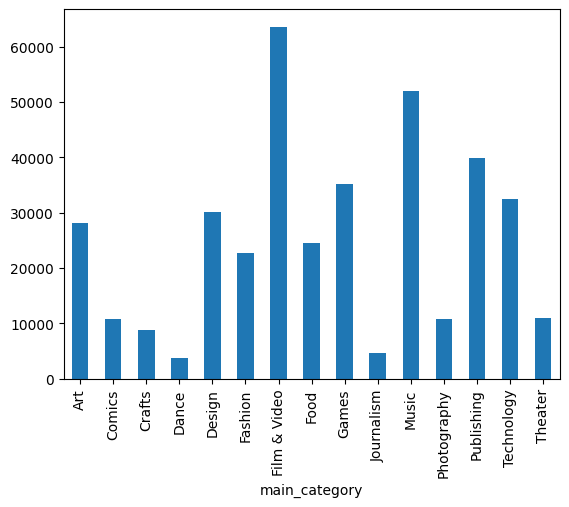

In [5]:
df.groupby('main_category').name.count().plot.bar(ylim=0)
plt.show()

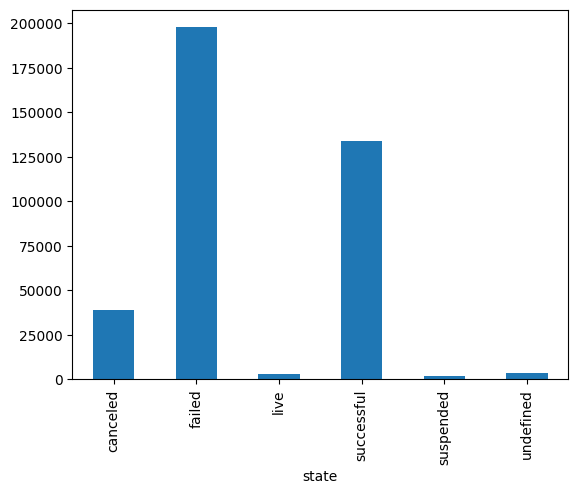

In [6]:
df.groupby('state').name.count().plot.bar(ylim=0)
plt.show()

## Split Data
Spliting data into training and testing sets.

In [8]:
# factorize() makes discrete into continuous
df['state_num'] = df['state'].factorize()[0]
df['category_num'] = df['main_category'].factorize()[0]

In [18]:
x = pd.concat([df['goal'], df['category_num'], df['backers'], df['pledged']], axis=1, keys=['goal', 'main_category', 'backers', 'pledged'])
y = df['state_num']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [21]:
model = KNeighborsClassifier(n_neighbors=10)

model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [28]:
class_names = ['failed', 'cancelled', 'successful', 'live', 'undefined', 'suspended']
print(metrics.classification_report(y_test, predictions, target_names=class_names))

print("Accuracy: {}".format(metrics.accuracy_score(y_test, predictions)))

              precision    recall  f1-score   support

      failed       0.82      0.99      0.90     39509
   cancelled       0.28      0.01      0.02      7733
  successful       0.98      1.00      0.99     26741
        live       0.00      0.00      0.00       574
   undefined       0.89      0.14      0.24       775
   suspended       0.00      0.00      0.00       401

    accuracy                           0.87     75733
   macro avg       0.49      0.36      0.36     75733
weighted avg       0.81      0.87      0.82     75733

Accuracy: 0.8736746200467431


d:\BDIC\Stage4_Semester1\Machine Learning\KickStarter\venvML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\BDIC\Stage4_Semester1\Machine Learning\KickStarter\venvML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\BDIC\Stage4_Semester1\Machine Learning\KickStarter\venvML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  